In [1]:
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False 

import jieba
import jieba.analyse as anls
from snownlp import SnowNLP
from wordcloud import WordCloud

In [2]:
comment = pd.read_csv('douwei.csv', dtype={'content' : str})

E:\IDE\Anaconda3\envs\iSpider\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


E:\IDE\Anaconda3\envs\iSpider\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


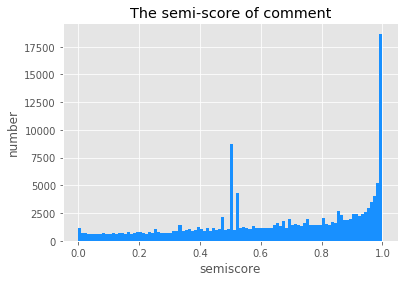

In [3]:
plt.hist(comment['semiscore'], bins=np.arange(0, 1.01, 0.01), label='semisocre', color='#1890FF')
plt.xlabel("semiscore")
plt.ylabel("number")
plt.title("The semi-score of comment")
plt.show()

In [4]:
semilabel = comment['semilabel'].value_counts()
semilabel = semilabel.loc[[1, -1]]

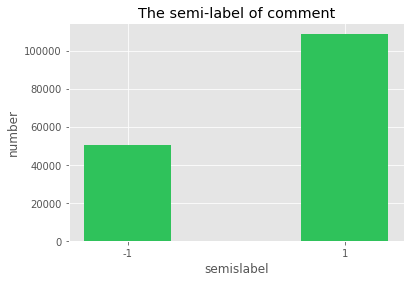

In [5]:
plt.bar(semilabel.index, semilabel.values, tick_label=semilabel.index, color='#2FC25B')
plt.xlabel("semislabel")
plt.ylabel("number")
plt.title("The semi-label of comment")
plt.show()

In [16]:
comment_list = comment['content'].tolist()

In [17]:
text = ''.join(str(s) for s in comment['content'] if s not in [None])

In [18]:
jieba.add_word('窦唯')

In [19]:
word_list = jieba.cut(text, cut_all=False)

In [20]:
stopwords = [line.strip() for line in open('stopwords.txt',encoding='UTF-8').readlines()]

In [21]:
clean_list = [seg for seg in word_list if seg not in stopwords]

In [22]:
clean_text = ''.join(clean_list)

In [23]:
cloud = WordCloud(  
    font_path = 'F:\fonts\FZBYSK.TTF',   
    background_color = 'white',  
    max_words = 1000,  
    max_font_size = 64       
) 
word_cloud = cloud.generate(clean_text) 

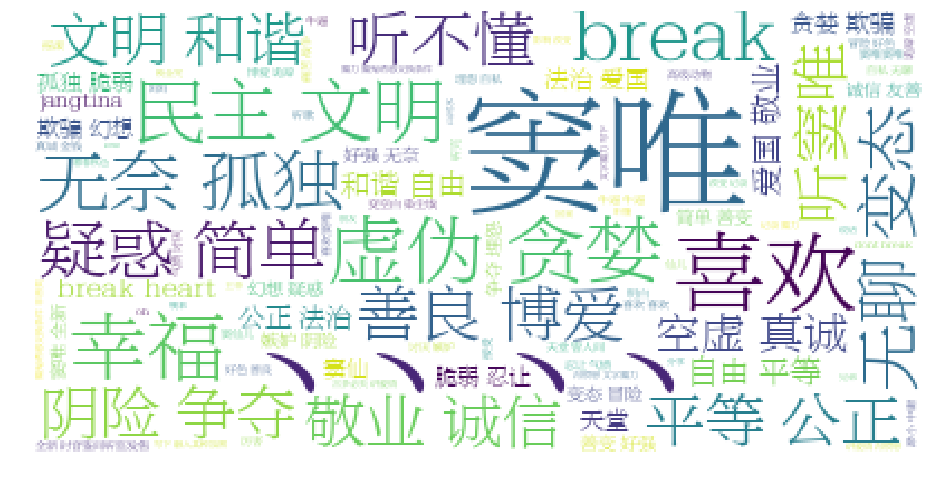

In [24]:
plt.figure(figsize=(16, 16))
plt.imshow(word_cloud)  
plt.axis('off')  
plt.show()

In [25]:
for x, w in anls.extract_tags(clean_text, topK=30, withWeight=True):
    print('{0}: {1}'.format(x, w))

窦唯: 0.42413291834396716
喜欢: 0.06957578176575312
摇滚: 0.06033973714834343
仙儿: 0.04675445894733308
王菲: 0.04141731266363808
窦仙: 0.02643030901407866
听歌: 0.025204620147489854
听不懂: 0.01897676366866765
幸福: 0.014328361715492606
成仙: 0.014316371791854642
汪峰: 0.013746082341014425
大仙: 0.01329064108018
高级: 0.01282524799813557
黑梦: 0.012747164212523605
前奏: 0.01246511681876999
黑豹: 0.012161033254634693
艳阳天: 0.012078606648929709
动物: 0.012021230215053975
吉他: 0.011081296081783527
听懂: 0.011070506620843593
歌曲: 0.011028560171870806
忘词: 0.01095390936549587
希望: 0.01056703765669609
理解: 0.010229556688519676
厉害: 0.010106852102344499
听听: 0.009539585614617024
哀伤: 0.009312048537094752
窦靖童: 0.009121264577045466
电影: 0.008985679604219497
送别: 0.008679707738986586
